### Step 1: Choose Your Data Set
Titanic Data (from Kaggle website). Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.

### Step 2: Get Organized
Package includes:
 - iPython Notebook Report (HTML Format)
 - iPython Notebook (ipynb Format)

Data Used:
 - titanic_data.csv

In [38]:
# Install Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
# Load CSV file into DataFrame
titanic_df = pd.read_csv('titanic_data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


### Step 3/4: Analyze Your Data & Share Your Findings
This project seeks to answer the following questions:
 - What type of passengers were on-board the Titanic (Gender, Age, Class)?
 - How does a passenger's class relate to which deck he/she is on?
 - How many families were on-board (vs. passengers traveling alone)?
 - What factors made more people likely to survive?*
 
*It should be noted that these findings are tentative, and will require further statistical analysis to ensure their validity

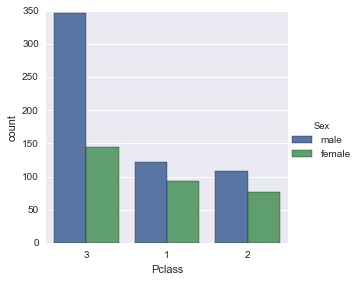

In [40]:
# Gender Breakdown
sns.factorplot(x = 'Pclass',data=titanic_df, kind = 'count', hue = 'Sex')

Most passengers were in 3rd class. While the count of male and female passengers for the first two classes are fairly similar, 3rd class contained almost double the number of male than female passengers.

This does not take into account the passengers' ages, so further analysis is conducted to separate children from adult passengers

In [41]:
# Create New Category - Find children (age <= 16 y.o.)
def find_child(passenger):
    age, sex = passenger
    if age <= 16:
        return 'child'
    else:
        return sex
    
# Apply to DataFrame to add new column
titanic_df['PersonType'] = titanic_df[['Age', 'Sex']].apply(find_child, axis = 'columns')
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PersonType
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child


Counts of Passenger Type
male      526
female    265
child     100
Name: PersonType, dtype: int64


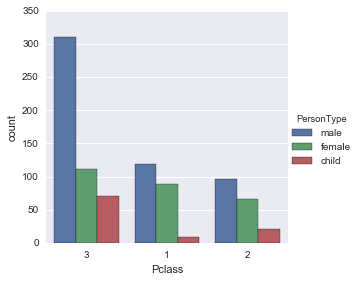

In [42]:
sns.factorplot('Pclass', data=titanic_df, hue='PersonType', kind='count')
print 'Counts of Passenger Type'
print titanic_df['PersonType'].value_counts()

A high proportion of the children on-board the Titanic were in 3rd class.

The average age of people on-board the titanic (based on the given sample of 891 passengers) was: 29.70 years.


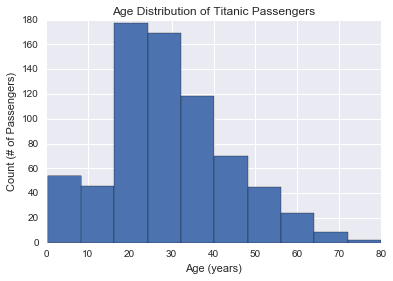

In [43]:
print "The average age of people on-board the titanic (based on the given sample of %d passengers) was: %2.2f years." % \
(titanic_df['PassengerId'].max(), titanic_df['Age'].mean())
plt.figure()
titanic_df['Age'].hist()
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age (years)')
plt.ylabel('Count (# of Passengers)')

In [44]:
# Finding the differences in mean Age and Fare by Passenger Class
titanic_df.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


As expected, the average fare cost for 1st class is markedly higher (around 4x the cost of 2nd class on average). The average age is also noticably higher for 1st class passengers, as is the survival rate. This will be analyzed further later in this report

687 lines of data have been omitted for missing values on Cabin listing


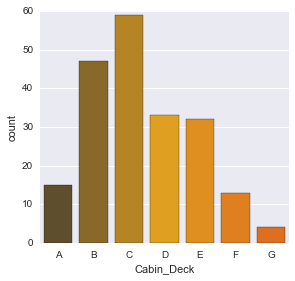

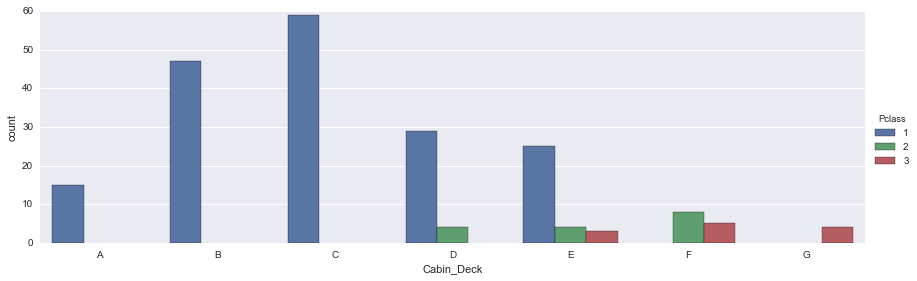

In [45]:
deck = titanic_df['Cabin']
levels = []
omit_count = 0
for level in deck:
    if isinstance(level, str):
        levels.append(level[0])
    else:
        levels.append('Empty')
        omit_count += 1
        
cabin_df = pd.DataFrame(levels)
cabin_df.columns = ['Cabin_Deck']
sns.factorplot('Cabin_Deck', data=cabin_df, kind='count', palette='autumn_d', order=['A','B','C','D','E','F','G'])
titanic_df_cabin = pd.concat([titanic_df, cabin_df], axis=1)
sns.factorplot('Cabin_Deck', data=titanic_df_cabin, kind='count', hue='Pclass', order=['A','B','C','D','E','F','G'], \
               hue_order=[1,2,3],size=4, aspect=3)
print '%d lines of data have been omitted for missing values on Cabin listing' % omit_count

The most populated level was the C-Deck. Decks A, B, and C also contained only 1st-class passengers.

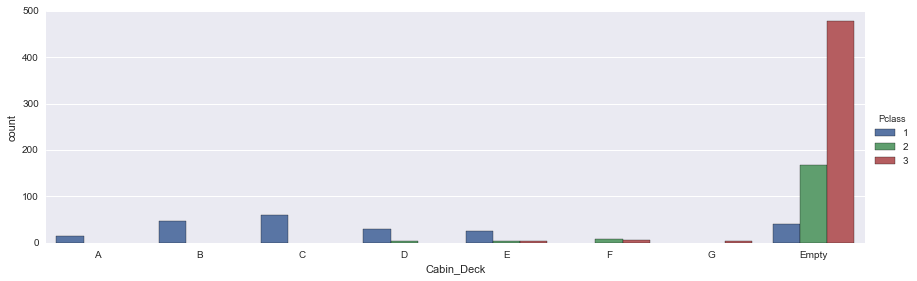

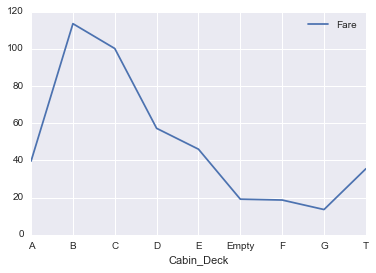

In [46]:
# Identifying unlisted cabin data
sns.factorplot('Cabin_Deck', data=titanic_df_cabin, kind='count', hue='Pclass', order=['A','B','C','D','E','F','G','Empty'], \
               hue_order=[1,2,3],size=4, aspect=3)
average_fare = titanic_df_cabin.groupby('Cabin_Deck').mean()[['Fare']]
average_fare.plot()

#### Note on omitted data:
Note that a large chunk of data has been omitted (almost 80% of all data), as Cabin information is not given for every line item. The plot above shows the number of passengers in each class with no listed cabin, compared to those in cabins A-G.

There seems to be a significant portion of 2nd and 3rd class passengers with an unlisted cabin. The second figure shows the average fare for passengers with an unlisted cabin ('Empty') is fairly similar to those in the lower cabin decks (F and G). However, we can not be sure of the actual meaning of these unlisted items. For this reason, they have been omitted from the previous analysis.

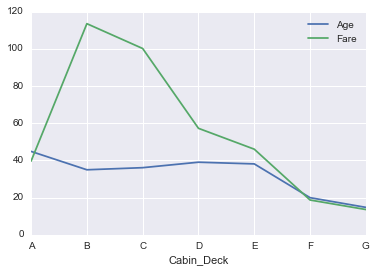

In [47]:
##### Calculated the average fare cost and age per Cabin Deck
average_fare_age = titanic_df_cabin.groupby('Cabin_Deck').mean()[['Age', 'Fare']]
average_fare_age.drop(['Empty','T'], inplace=True)
average_fare_age.plot()

There appears to be a clear correlation between Cabin Deck location and fare price, with fare cost decreasing as cabin level decreases (Deck A is Upper Promenade, while G is the Lower Deck). However, Cabin Deck A shows a much lower fare cost than Deck B. This could be explained by looking more closely at the floorplan (Cabins on Deck A are significantly smaller than those on Decks B and C).

URL for Titanic Deckplans: http://www.encyclopedia-titanica.org/titanic-deckplans/a-deck.html

In [48]:
# Who were traveling alone vs. with family
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

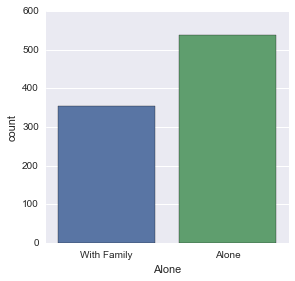

In [49]:
sns.factorplot('Alone', data=titanic_df, kind='count')

The mean survival rate was 38.4% for the given set of data


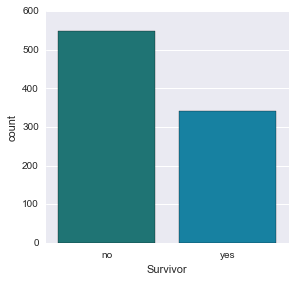

In [50]:
# Determine which factors led to passenger survival
titanic_df['Survivor'] = titanic_df['Survived'].map({0:'no',1:'yes'})
titanic_df_cabin['Survivor'] = titanic_df_cabin['Survived'].map({0:'no',1:'yes'})
sns.factorplot('Survivor', data=titanic_df, kind='count', palette='winter_d', order=['no', 'yes'])
print 'The mean survival rate was %2.1f%% for the given set of data' % ((titanic_df['Survived'].mean())*100)

Pclass  PersonType
1       child         0.888889
        female        0.977273
        male          0.352941
2       child         0.904762
        female        0.909091
        male          0.082474
3       child         0.400000
        female        0.486486
        male          0.119355
Name: Survived, dtype: float64

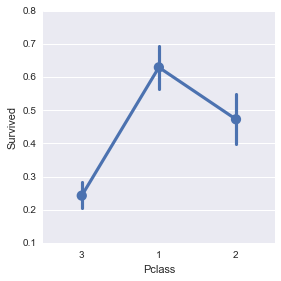

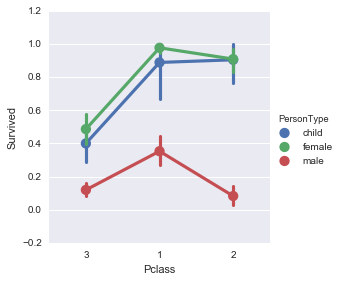

In [51]:
# Check class as a factor for survival rate
sns.factorplot(x='Pclass', y='Survived', data=titanic_df)
sns.factorplot(x='Pclass', y='Survived', data=titanic_df, hue='PersonType', hue_order=['child','female','male'])
titanic_df.groupby(['Pclass','PersonType']).mean()['Survived']

Survival rate was very much dependent on fare class (1st class passengers had a much higher survival rate than 2nd, and 2nd was much higher than 3rd).

Additionally, children and female passengers had a much higher survival rate than male survivors, with the greatest difference observed in 2nd class (male 2nd class passengers had a survival rate of around 8%, while women and children in the same class had a survival rate of approx. 90%).

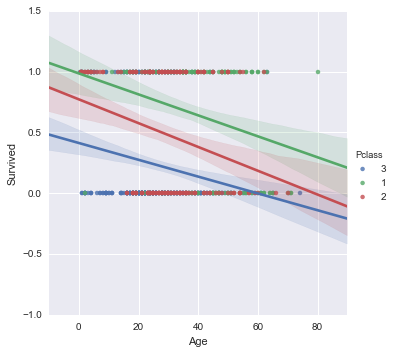

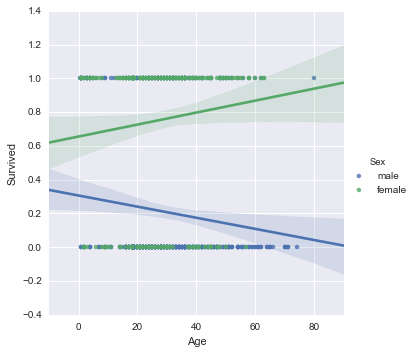

In [52]:
# Plotting by age and class
sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass')
sns.lmplot('Age','Survived',data=titanic_df,hue='Sex')

As the first figure shows, survival rate in general decreased with age and with passenger class. However, there is much more variation in survival rate for older passengers.

The second figure shows that survival rate increased with age for women, while decreasing with age for men.

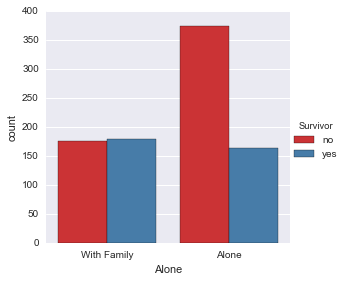

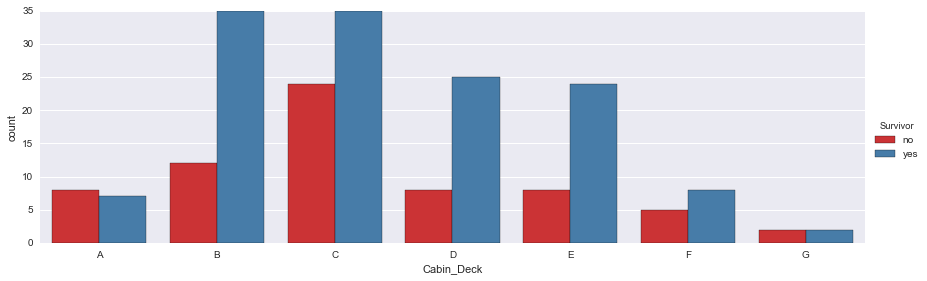

In [53]:
sns.factorplot('Alone', data=titanic_df, hue='Survivor', kind='count', palette='Set1',hue_order=['no','yes'])
sns.factorplot('Cabin_Deck', data=titanic_df_cabin, hue='Survivor', kind='count', x_order = ['A','B','C','D','E','F','G'], \
              palette='Set1', size=4, aspect=3)

Passengers had a better chance of surviving if with family vs. if alone. Also, survival rate was highest for upper-level cabin decks. This is to be expected, as these decks were reserved for 1st-class passengers, who also had a higher overall survival rate.

### Conclusions / Discussion
The following conclusions were found in this study:
 - Passengers with family had a better survival rate than those traveling alone.
 - Being in a higher passenger class gave a better survival rate
 - Gender and Age also played a major role in survival (women and children had a much higher survival rate than men, regardless of passenger class)
 
#### Notes: 
 - This data does not contain all passengers on-board, so the actual case could be somewhat different from the conclusions drawn based on this sample of data. Statistical testing is needed to determine the confidence level of the conclusions drawn from this data sample.
 - Also, we cannot draw valid conclusions on passenger survival rates based on cabin location, because the majority of the data did not have this information listed. All figures above based on cabin deck have omitted this data.

### Resources used to complete this project:
 - Tutorials and Forums
    - http://stackoverflow.com/
    - https://stanford.edu/~mwaskom/software/seaborn/tutorial.html
    - http://chrisalbon.com/#Python
    - http://matplotlib.org/users/pyplot_tutorial.html
    - https://github.com/jmportilla/Udemy-notes
 - Background Information
    - http://www.encyclopedia-titanica.org/titanic-deckplans/
    - http://www.dummies.com/how-to/content/suites-and-cabins-for-passengers-on-the-titanic.html